# Bayesian Network_bnlearn

* スコアベースアプローチ

In [ ]:
!pip install -U bnlearn
!pip install pyvis

In [1]:
import bnlearn
import pandas as pd
from sklearn.datasets import load_boston

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data,columns=boston.feature_names)
#目的変数の追加
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# 離散値に変更
df_discrete = df.copy()

df_discrete['CRIM'] = pd.cut(df_discrete['CRIM'], 5)
df_discrete['ZN'] = pd.cut(df_discrete['ZN'], 5)
df_discrete['INDUS'] = pd.cut(df_discrete['INDUS'], 5)
df_discrete['CHAS'] = pd.cut(df_discrete['CHAS'], 5)
df_discrete['NOX'] = pd.cut(df_discrete['NOX'], 5)
df_discrete['RM'] = pd.cut(df_discrete['RM'], 5)
df_discrete['AGE'] = pd.cut(df_discrete['AGE'], 5)
df_discrete['DIS'] = pd.cut(df_discrete['DIS'], 5)
df_discrete['RAD'] = pd.cut(df_discrete['RAD'], 5)
df_discrete['TAX'] = pd.cut(df_discrete['TAX'], 5)
df_discrete['PTRATIO'] = pd.cut(df_discrete['PTRATIO'], 5)
df_discrete['B'] = pd.cut(df_discrete['B'], 5)
df_discrete['LSTAT'] = pd.cut(df_discrete['LSTAT'], 5)
df_discrete['MEDV'] = pd.cut(df_discrete['MEDV'], 5)

df_discrete.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,"(-0.0826, 17.8]","(-0.1, 20.0]","(0.433, 5.916]","(-0.001, 0.2]","(0.482, 0.579]","(5.649, 6.692]","(61.16, 80.58]","(3.329, 5.528]","(0.977, 5.6]","(291.8, 396.6]","(14.48, 16.36]","(317.584, 396.9]","(1.694, 8.978]","(23.0, 32.0]"
1,"(-0.0826, 17.8]","(-0.1, 20.0]","(5.916, 11.372]","(-0.001, 0.2]","(0.385, 0.482]","(5.649, 6.692]","(61.16, 80.58]","(3.329, 5.528]","(0.977, 5.6]","(186.476, 291.8]","(16.36, 18.24]","(317.584, 396.9]","(8.978, 16.226]","(14.0, 23.0]"
2,"(-0.0826, 17.8]","(-0.1, 20.0]","(5.916, 11.372]","(-0.001, 0.2]","(0.385, 0.482]","(6.692, 7.736]","(41.74, 61.16]","(3.329, 5.528]","(0.977, 5.6]","(186.476, 291.8]","(16.36, 18.24]","(317.584, 396.9]","(1.694, 8.978]","(32.0, 41.0]"
3,"(-0.0826, 17.8]","(-0.1, 20.0]","(0.433, 5.916]","(-0.001, 0.2]","(0.385, 0.482]","(6.692, 7.736]","(41.74, 61.16]","(5.528, 7.728]","(0.977, 5.6]","(186.476, 291.8]","(18.24, 20.12]","(317.584, 396.9]","(1.694, 8.978]","(32.0, 41.0]"
4,"(-0.0826, 17.8]","(-0.1, 20.0]","(0.433, 5.916]","(-0.001, 0.2]","(0.385, 0.482]","(6.692, 7.736]","(41.74, 61.16]","(5.528, 7.728]","(0.977, 5.6]","(186.476, 291.8]","(18.24, 20.12]","(317.584, 396.9]","(1.694, 8.978]","(32.0, 41.0]"


## 構造学習

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


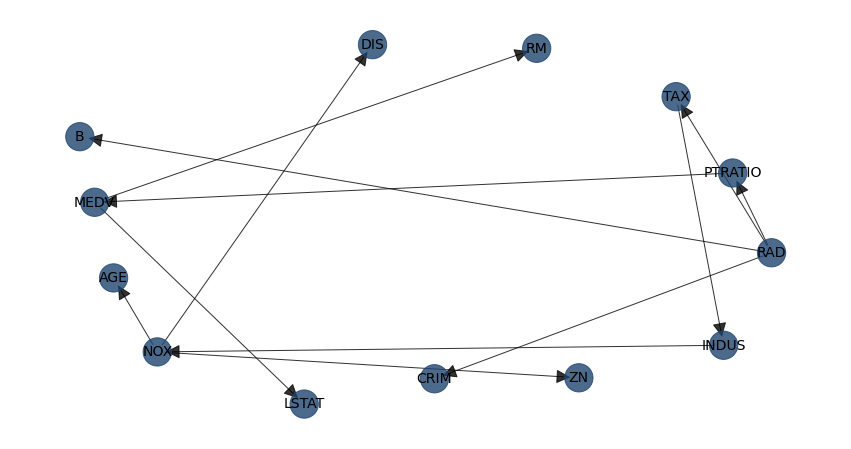

{'G': <networkx.classes.digraph.DiGraph at 0x7fbb39fc84d0>,
 'edge_properties': {('INDUS', 'NOX'): {'color': '#000000', 'weight': 1},
  ('MEDV', 'LSTAT'): {'color': '#000000', 'weight': 1},
  ('MEDV', 'RM'): {'color': '#000000', 'weight': 1},
  ('NOX', 'AGE'): {'color': '#000000', 'weight': 1},
  ('NOX', 'DIS'): {'color': '#000000', 'weight': 1},
  ('NOX', 'ZN'): {'color': '#000000', 'weight': 1},
  ('PTRATIO', 'MEDV'): {'color': '#000000', 'weight': 1},
  ('RAD', 'B'): {'color': '#000000', 'weight': 1},
  ('RAD', 'CRIM'): {'color': '#000000', 'weight': 1},
  ('RAD', 'PTRATIO'): {'color': '#000000', 'weight': 1},
  ('RAD', 'TAX'): {'color': '#000000', 'weight': 1},
  ('TAX', 'INDUS'): {'color': '#000000', 'weight': 1}},
 'node_properties': {'AGE': {'node_color': '#1f456e', 'node_size': 800},
  'B': {'node_color': '#1f456e', 'node_size': 800},
  'CHAS': {'node_color': '#1f456e', 'node_size': 800},
  'CRIM': {'node_color': '#1f456e', 'node_size': 800},
  'DIS': {'node_color': '#1f456e', 

In [8]:
#構造学習を行う
model = bnlearn.structure_learning.fit(df_discrete,methodtype='hc',scoretype='bic')

#構造の可視化
bnlearn.plot(model)

In [7]:
#隣接行列の表示
adjmat = model['adjmat'] * 1
adjmat.head(100)

target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
source,,,,,,,,,,,,,,
CRIM,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ZN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
INDUS,0,0,0,0,1,0,0,0,0,0,0,0,0,0
CHAS,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NOX,0,1,0,0,0,0,1,1,0,0,0,0,0,0
RM,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AGE,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DIS,0,0,0,0,0,0,0,0,0,0,0,0,0,0
RAD,1,0,0,0,0,0,0,0,0,1,1,1,0,0


## ブートストラップを行う

In [9]:
#モデルを検証するためにデータを分ける
train_data = df_discrete.sample(frac = 0.9)
test_data = df_discrete.drop(train_data.index)

#ブートストラップを用いた構造学習
adjmat_list = []
for ignored in range(0,100):
  d = train_data.sample(frac = 0.5)
  est_model = bnlearn.structure_learning.fit(d,methodtype='hc',scoretype='bic',verbose=0)
  adjmat_list.append(est_model['adjmat'])

avg_adjmat = sum(adjmat_list)
adjmat = (avg_adjmat > (100*0.5) )*1

#隣接行列からbnlearn用のオブジェクトを作り可視化
m = bnlearn.bnlearn.to_BayesianModel(adjmat,verbose=1)
boot_model = {'model':m,'adjmat':adjmat}
bnlearn.plot(boot_model,figsize=(25,10))

AttributeError: ignored